In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
artificial_result = np.array([[40, 60, 80, 100, 120, 140, 180],
               [2375 ,3627, 4665, 6348, 6457, 8358, 21485],
               [71.7, 69.8, 76.2, 82.4, 84.2, 83.0, 85.0],
              [2150,  3453, 4588, 5482, 6495, 8105, 11339],
              [92.84, 114.71, 129.04, 119.18, 129.90, 141.19, 162.14],
            [81.23, 101.29, 115.10, 105.44, 116.91, 127.20, 144.73],
            [11.60, 13.41, 13.94, 13.73, 12.98, 13.98, 17.40]]).transpose()

real_result = np.array([[270, 244, 197, 141, 182, 100, 155, 188, 110, 
                          95, 105, 121],
                        [5358, 4303, 2531, 2136, 3302, 1749, 2572, 3647, 1598, 1694, 1834, 2246],
                        [109.51, 107.31, 97.11, 95.11, 99.72, 93.03, 89.87, 91.11, 87.10,
                          87.83, 91.38, 91.84],
                        [5082, 4108, 2392, 2047, 3211, 1705, 2414, 3466, 1520, 1663, 1746, 2144],
                      [1051.30, 747.81, 740.82, 963.44 ,1350.40, 765.62, 975.16, 503.35, 320.80,
                        262.79, 286.45, 347.62], 
                        [961.91, 656.66, 658.14, 796.81, 1167.49, 585.72, 817.85, 423.03, 240.38, 
                         181.04, 200.34,262.62],
                        [89.38, 91.14, 82.67, 166.62, 182.90, 179.89, 157.31, 80.31, 80.41, 
                         81.75, 86.10, 85.00]]).transpose()
cases = ['270', '244', '197', '141', '182', '100', '155', '188', '110', '95', '105', '121']

In [2]:
artificial_data = pd.DataFrame(data = artificial_result, 
                               columns=['NCases','base_TWS',
                                        'base_execution_time',
                                      'sugg_TWS','sugg_execution_time',
                                       'prediction_time',
                                        'allocation_time'])
real_data = pd.DataFrame(data = real_result, columns=['NCases','base_TWS',
                                                      'base_execution_time',
                                                     'sugg_TWS','sugg_execution_time',
                                                      'prediction_time',
                                                      'allocation_time'
                                                     ])


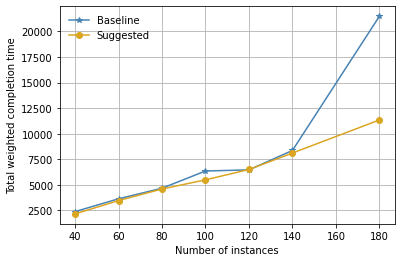

In [3]:
## Experiment using artificial data 
## Total weighted completion time
plt.plot(artificial_data['NCases'], artificial_data['base_TWS'], label = 'Baseline', marker = '*', color = 'steelblue')
plt.plot(artificial_data['NCases'], artificial_data['sugg_TWS'], label = 'Suggested', marker = 'o', color = 'goldenrod')
plt.xlabel('Number of instances')
plt.ylabel('Total weighted completion time')
plt.legend(frameon = False)
plt.grid()
# plt.savefig('arti_twct.jpg')
plt.show()

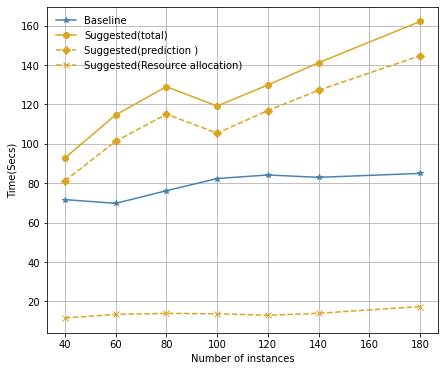

In [59]:
## Experiment using artificial data 
## Execution time
plt_1 = plt.figure(figsize=(7, 6))
plt.plot(artificial_data['NCases'], artificial_data['base_execution_time'], 
         label = 'Baseline', marker = '*', color = 'steelblue')
plt.plot(artificial_data['NCases'], artificial_data['sugg_execution_time'],
         label= 'Suggested(total)', marker= 'o', color = 'goldenrod')
plt.plot(artificial_data['NCases'], artificial_data['prediction_time'], 
         label = 'Suggested(prediction )', marker = 'D',  color = 'goldenrod', linestyle = '--')
plt.plot(artificial_data['NCases'], artificial_data['allocation_time'], 
         label = 'Suggested(Resource allocation)', marker = 'x',  color = 'goldenrod', linestyle = '--')
plt.xlabel('Number of instances')
plt.ylabel('Time(Secs)')
plt.grid()
plt.legend(frameon = False)
plt.show()
# plt.savefig('arti_time.jpg')


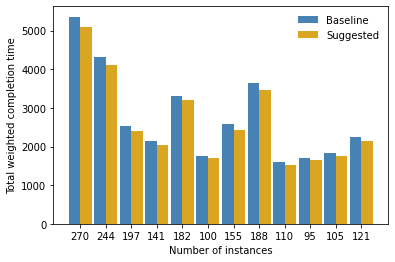

In [60]:
## Experiment using real data 
## Total weighted completion time
fig, ax = plt.subplots()
width = 0.45
x = np.arange(12)
base = ax.bar(x-width/2, real_data['base_TWS'], width, label = 'Baseline', color = 'steelblue')
sugg = ax.bar(x+width/2, real_data['sugg_TWS'], width, label = 'Suggested', color = 'goldenrod')
ax.set_xticks(x)
ax.set_xlabel('Number of instances')
ax.set_ylabel('Total weighted completion time')
ax.set_xticklabels(cases)
plt.legend(frameon = False)
plt.show()
# plt.savefig('real_twct.jpg')


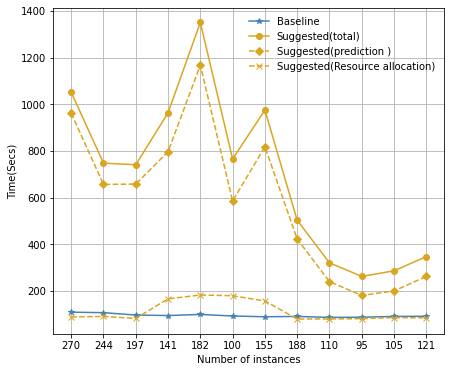

In [61]:
## Experiment using real data 
## Execution time
plt_2 = plt.figure(figsize=(7,6))
plt.plot(cases, real_data['base_execution_time'], 
         label = 'Baseline', marker = '*', color = 'steelblue')
plt.plot(cases, real_data['sugg_execution_time'],
         label= 'Suggested(total)', marker= 'o', color = 'goldenrod')
plt.plot(cases, real_data['prediction_time'], 
         label = 'Suggested(prediction )', marker = 'D',  color = 'goldenrod', linestyle = '--')
plt.plot(cases,real_data['allocation_time'], 
         label = 'Suggested(Resource allocation)', marker = 'x',  color = 'goldenrod', linestyle = '--')
plt.xlabel('Number of instances')
plt.ylabel('Time(Secs)')
plt.grid()
plt.legend(frameon = False)
plt.show()
# plt.savefig('real_time.jpg')

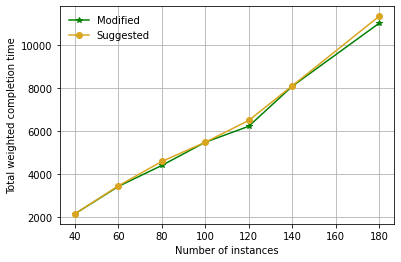

In [12]:
### Using 'modify plan' emprovement 
modified_TWS = [2150,  3426, 4403, 5482, 6223, 8083, 11015]
plt.plot(artificial_data['NCases'], modified_TWS, label = 'Modified', marker = '*', color = 'green')
plt.plot(artificial_data['NCases'], artificial_data['sugg_TWS'], label = 'Suggested', marker = 'o', color = 'goldenrod')
plt.xlabel('Number of instances')
plt.ylabel('Total weighted completion time')
plt.legend(frameon = False)
plt.grid()
plt.show()
# plt.savefig('modify.jpg')

In [48]:
# This was randomly taken at time T
graph_nodes = [('s', 840775  ), ('s', 901719), ('s', 984787), ('s', 459158), ('s', 840775), (840775, 103), 
               (840775, 10461), (840775, 10915), (103, 't'), (10461, 't'), (10915, 't'), (901719, 11768), 
               (901719, 12323), (901719, 13096), (11768, 't'), (12323, 't'), (13096, 't'),
               (984787, 13133), (984787, 1335), (984787, 32914), (13133, 't'), (1335, 't'),
               (32914, 't'), (459158, 13133), (459158, 1335), (459158, 32914),
               (840775, 35581), (840775, 33320), (35581, 't'), (33320, 't')]

min_max_solution = [('s', 840775  ), ('s', 901719), ('s', 984787), ('s', 459158), ('s', 840775),
                    (840775,103), (901719,11768),(984787, 1335), (459158,13133), (840775,35581),
                    (103, 't'), (1335, 't'),(11768, 't'),(13133, 't'),(35581, 't')]

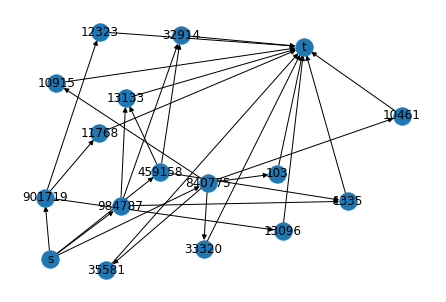

In [37]:
G = nx.DiGraph()
for i in graph_nodes :
    G.add_edge(i[0],i[1])
    
nx.draw(G, with_labels = True)
plt.show()

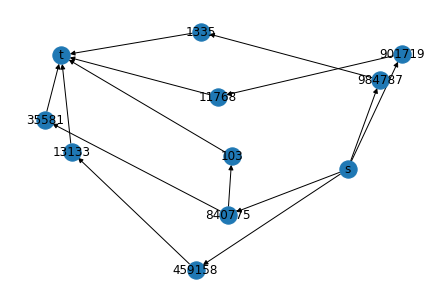

In [51]:
min_max_graph = nx.DiGraph()
for i in min_max_solution :
    min_max_graph.add_edge(i[0],i[1])
    
nx.draw(min_max_graph, with_labels = True)
plt.show()